In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("homes.csv")

# Display the first few rows
df.head()


,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160.0,28.0,10.0,5.0,3.0,60.0,0.28,3167.0
1,175,180.0,18.0,8.0,4.0,1.0,12.0,0.43,4033.0
2,129,132.0,13.0,6.0,3.0,1.0,41.0,0.33,1471.0
3,138,140.0,17.0,7.0,3.0,1.0,22.0,0.46,3204.0
4,232,240.0,25.0,8.0,4.0,3.0,5.0,2.05,3613.0


In [2]:
# Basic info and summary statistics
df.info()
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    51 non-null     object 
 1   List    50 non-null     float64
 2   Living  50 non-null     float64
 3   Rooms   50 non-null     float64
 4   Beds    50 non-null     float64
 5   Baths   50 non-null     float64
 6   Age     50 non-null     float64
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.7+ KB


Sell      0
List      1
Living    1
Rooms     1
Beds      1
Baths     1
Age       1
Acres     1
Taxes     1
dtype: int64

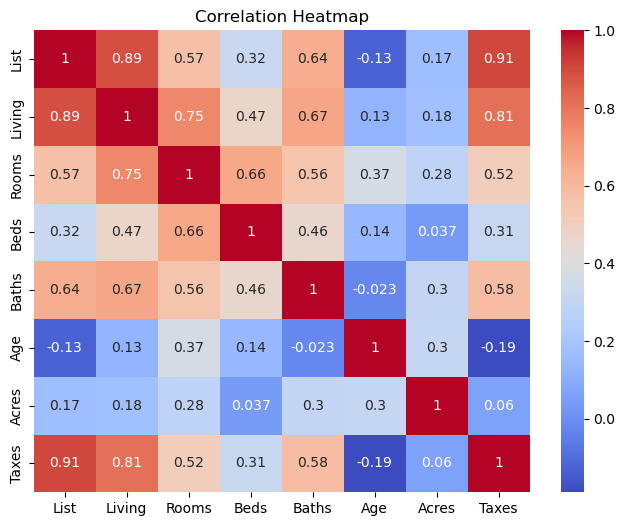

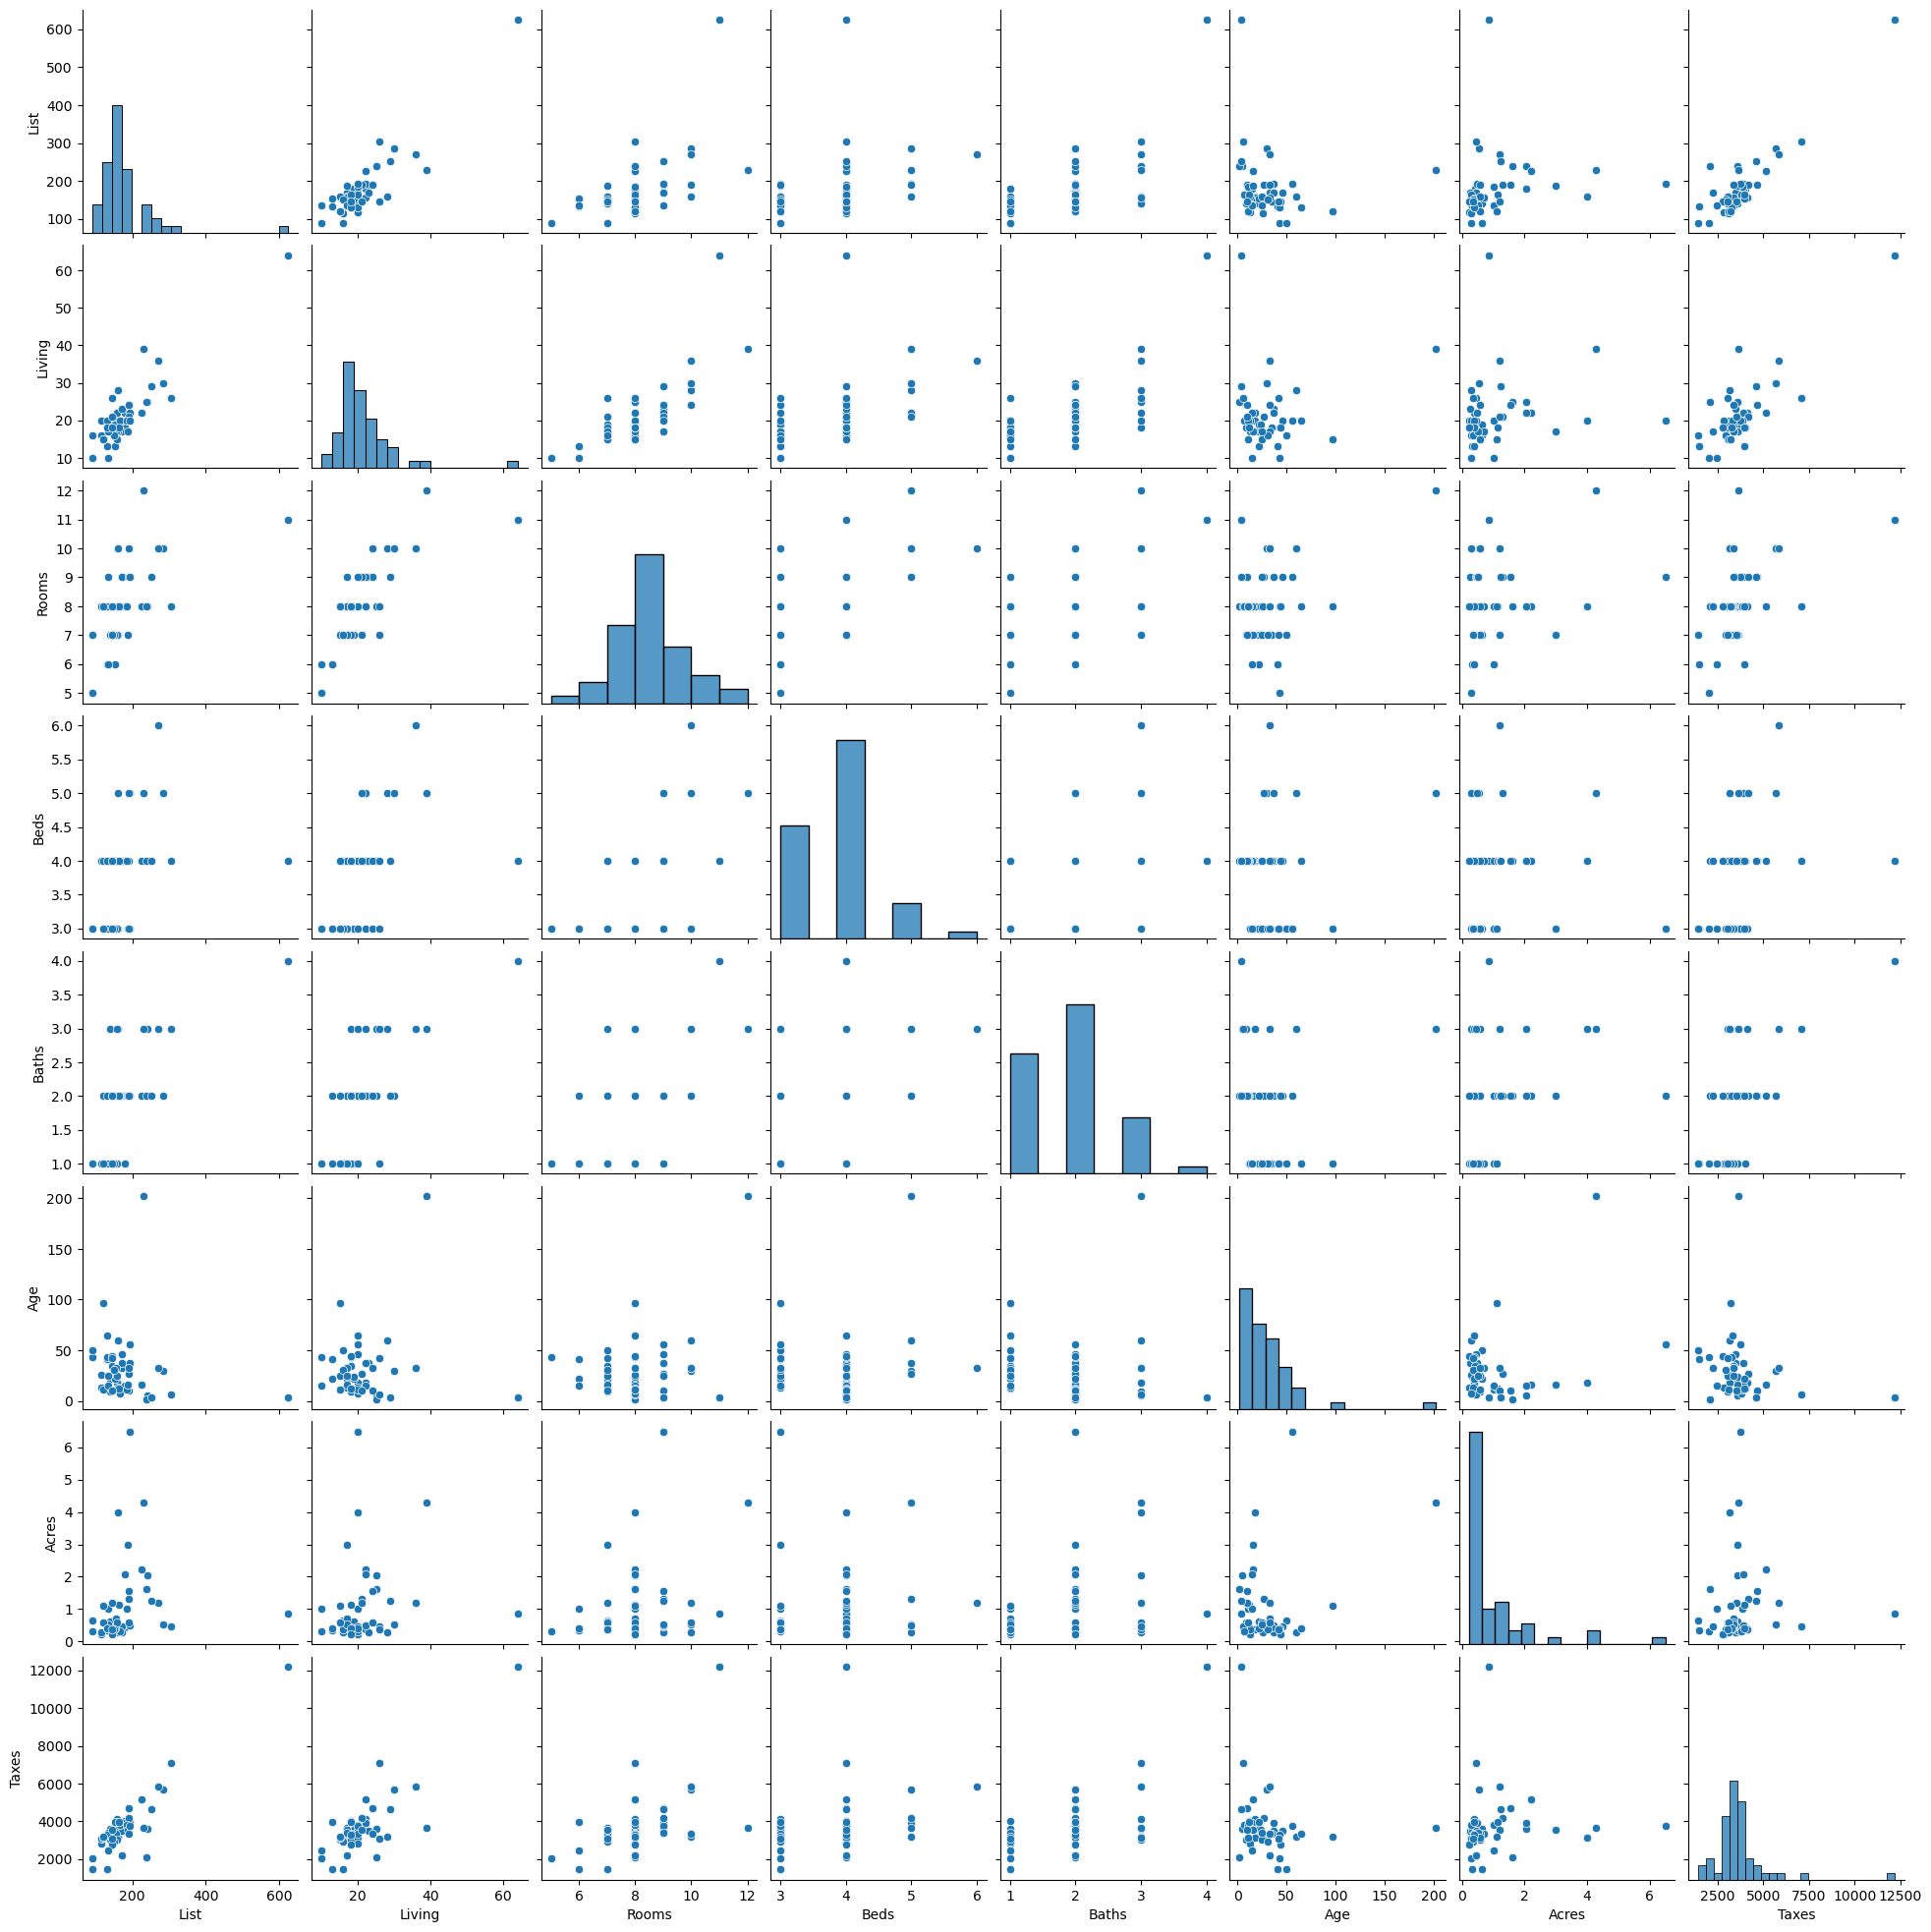

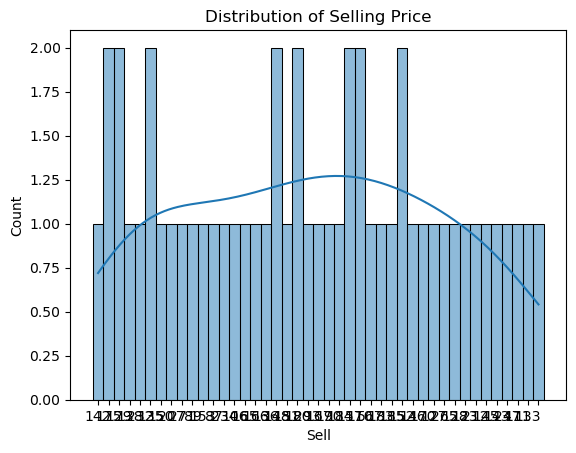

In [5]:
# Correlation heatmap (numeric columns only)
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

# Distribution of Selling Price
sns.histplot(df["Sell"], kde=True, bins=20)
plt.title("Distribution of Selling Price")
plt.show()



In [8]:
import statsmodels.api as sm

# Prepare data (drop missing and convert if needed)
df = df.dropna(subset=['Taxes', 'Sell'])
df['Sell'] = pd.to_numeric(df['Sell'], errors='coerce')

# Define variables
X = df[['Taxes']]
y = df['Sell']

# Add constant term (for intercept)
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           7.22e-19
Time:                        22:50:41   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.1

In [9]:
X2 = df[['Living']]  # or 'Beds', 'Rooms', etc.
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           4.39e-17
Time:                        22:51:00   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.5

# Model 1: Taxes vs. Sell

R² = 0.809 → This means about 81% of the variation in selling price is explained by property taxes.

Coefficient (Taxes) ≈ 16.88 → For every additional unit increase in property taxes, the model predicts that the selling price increases by about 16.9 units, assuming other factors remain constant.

p-value < 0.05 → The coefficient is statistically significant, suggesting taxes are a meaningful predictor of price.

Overall, this is a strong relationship, although it may also reflect that higher-tax areas are more expensive in general.


In [ ]:
# Model 2: Living Area vs. Sell

R² = 0.773 → This means about 77% of the variation in selling price is explained by the size of the living area.

Coefficient (Living) ≈ 7.66 → For every additional square foot of living area, the model predicts an average price increase of 7.66 units.

p-value < 0.05 → The coefficient is statistically significant.

In [ ]:
Conclusion:
The model using Taxes as the independent variable performs slightly better (R² = 0.809 vs. 0.773).
This suggests that property taxes are a slightly stronger predictor of selling price in this dataset.
However, since taxes are often correlated with home size and location, the relationship is likely indirect.
A multiple regression model (including both Taxes and Living area) could capture these effects more precisely.